In [2]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
import numpy as np
import joblib
import os

In [3]:
ImageSize = 256
BatchSize = 32

In [4]:
dataset = tf.keras.preprocessing.image_dataset_from_directory('PlantVillage',shuffle=True,image_size=(ImageSize,ImageSize),batch_size=BatchSize)

Found 2152 files belonging to 3 classes.


In [5]:
classNames = dataset.class_names

In [6]:
classNames

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [7]:
len(dataset)

68

(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)


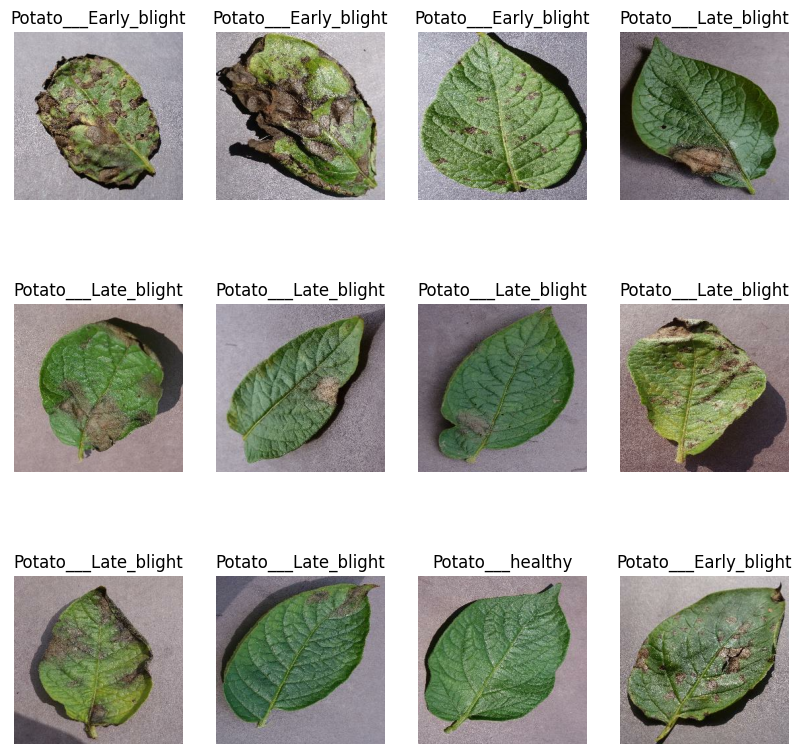

In [8]:
plt.figure(figsize=(10,10))
for image_batch,label_batch in dataset.take(1):
    for i in range(12):
        plt.subplot(3,4,i+1)
        print(image_batch[i].shape)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(classNames[label_batch[i]])
        plt.axis('off')
    # print(label_batch.numpy())

In [9]:
def get_dataset_partitions_tf(dataset,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=1000):
    dataset_size = len(dataset)
    
    if shuffle:
        dataset = dataset.shuffle(shuffle_size,seed=12)
    
    train_size = int(train_split*dataset_size)
    val_size = int(val_split*dataset_size)
    
    train_dataset = dataset.take(train_size)
    
    val_dataset = dataset.skip(train_size).take(val_size)
    test_dataset = dataset.skip(train_size).skip(val_size)
    
    return train_dataset,val_dataset,test_dataset

In [10]:
train_dataset,val_dataset,test_dataset = get_dataset_partitions_tf(dataset=dataset)

In [11]:
len(train_dataset)

54

In [12]:
len(val_dataset)

6

In [13]:
len(test_dataset)

8

In [14]:
train_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_dataset = val_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_dataset = test_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [15]:
n_classes = 3
input_shape = (ImageSize,ImageSize,3)

model = models.Sequential([
    layers.Conv2D(32,(3,3),activation='relu',input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,activation='relu',kernel_size=(3,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,activation='relu',kernel_size=(3,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,activation='relu',kernel_size=(3,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,activation='relu',kernel_size=(3,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,activation='relu',kernel_size=(3,3)),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax')
])

c:\Users\Divyansh\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model.build()

In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics = ['accuracy']
)

In [18]:
model.fit(train_dataset,epochs=50,batch_size=BatchSize,verbose=1,validation_data=val_dataset)

Epoch 1/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 59s 815ms/step - accuracy: 0.4722 - loss: 6.4828 - val_accuracy: 0.6667 - val_loss: 0.7459
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 40s 738ms/step - accuracy: 0.6631 - loss: 0.7169 - val_accuracy: 0.8698 - val_loss: 0.4133
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 38s 703ms/step - accuracy: 0.8766 - loss: 0.3273 - val_accuracy: 0.8281 - val_loss: 0.3974
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 37s 678ms/step - accuracy: 0.8712 - loss: 0.3077 - val_accuracy: 0.8021 - val_loss: 0.4719
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 39s 721ms/step - accuracy: 0.8851 - loss: 0.2829 - val_accuracy: 0.9635 - val_loss: 0.1235
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 39s 717ms/step - accuracy: 0.9621 - loss: 0.1079 - val_accuracy: 0.9583 - val_loss: 0.0874
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 38s 711ms/step - accuracy: 0.9581 - loss: 0.1146 - val_accuracy: 0.8333 - val_loss: 0.3970
Epoch 8/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 40s 745ms/step - accuracy: 0.9255 - loss: 0.1832 - val_accu

In [19]:
scores = model.evaluate(test_dataset)

8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 366ms/step - accuracy: 1.0000 - loss: 8.7739e-04


In [20]:
scores

[0.0016792061505839229, 1.0]

First Image to Predict
First Image's actual label:  Potato___Early_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step
Potato___Early_blight


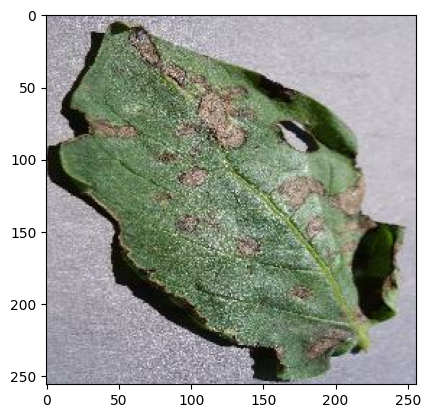

In [48]:
for image_batch,label_batch in test_dataset.take(1):
    first_image = image_batch[0].numpy().astype('uint8')
    first_label = label_batch[0].numpy()
    
    print("First Image to Predict")
    plt.imshow(first_image)
    print("First Image's actual label: ",classNames[first_label])
    batch_prediction = model.predict(image_batch)
    print(classNames[np.argmax(batch_prediction[0])])

In [71]:
def predict(model,img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array,0)
    
    predictions = model.predict(img_array)
    
    predicted_class = classNames[np.argmax(predictions[0])]
    
    confidence = round(100* (np.argmax(predictions[0])),2)
    
    return predicted_class,confidence

First Image to Predict
First Image's actual label:  Potato___Early_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
Potato___Early_blight


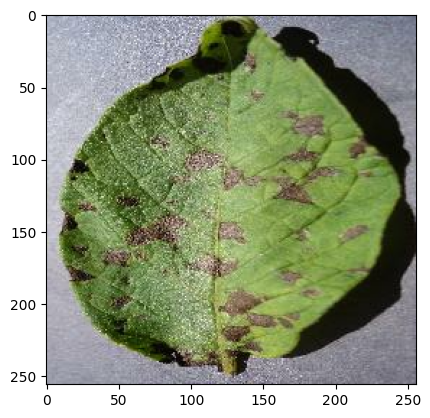

In [86]:
for image_batch,label_batch in test_dataset.take(1):
    first_image = image_batch[0].numpy().astype('uint8')
    first_label = label_batch[0].numpy()
    
    print("First Image to Predict")
    plt.imshow(first_image)
    print("First Image's actual label: ",classNames[first_label])
    batch_prediction = md.predict(image_batch)
    print(classNames[np.argmax(batch_prediction[0])])

In [19]:
# model_version = max([int(i) for i in os.listdir('./models')+[0]])+1
model.save(f'./models/potatos.h5')

In [24]:
from PIL import Image

img = Image.open('./PlantVillage/Potato___Early_blight/03b0d3c1-b5b0-48f4-98aa-f8904670290f___RS_Early.B 7051.JPG')
img_expanded = np.expand_dims(img,0)

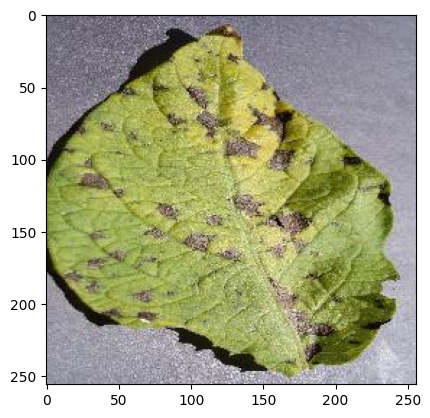

In [159]:
plt.imshow(img)

In [160]:
classNames[np.argmax(prediction_expanded)]

'Potato___Early_blight'